In [1]:
import numpy as np
import networkx as nx
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt

## Sparse

In [2]:
rng = np.random.default_rng(seed=42)
pts1 = rng.uniform(size=(100, 2))

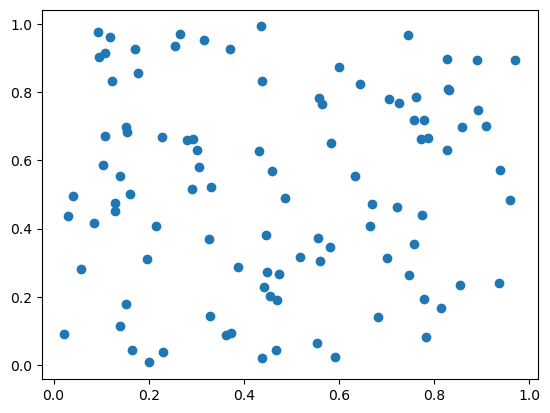

In [3]:
plt.scatter(pts1[:, 0], pts1[:, 1])

In [16]:
knn1 = NearestNeighbors(n_neighbors=3).fit(pts1)
nn_adjacency = knn1.kneighbors_graph(X=pts1, mode="connectivity")
nn_Graph = nx.from_scipy_sparse_array(nn_adjacency)

for node in nn_Graph.nodes:
    nn_Graph.remove_edge(node, node)

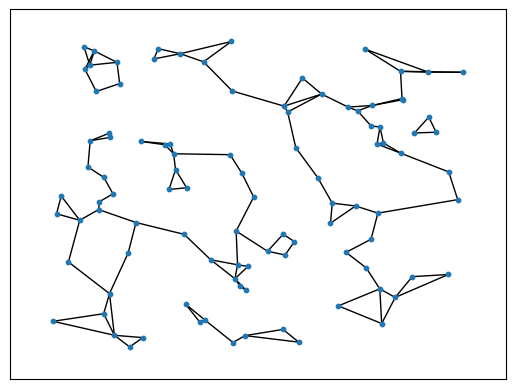

In [17]:
nx.draw_networkx(
    nn_Graph, pos={i: p for i, p in enumerate(pts1)}, with_labels=False, node_size=10
)

## Dense

In [6]:
pts2 = np.concatenate(
    (
        rng.normal(loc=(0.25, 0.25), scale=(0.05, 0.05), size=(50, 2)),
        rng.normal(loc=(0.75, 0.75), scale=(0.05, 0.05), size=(50, 2)),
    )
)

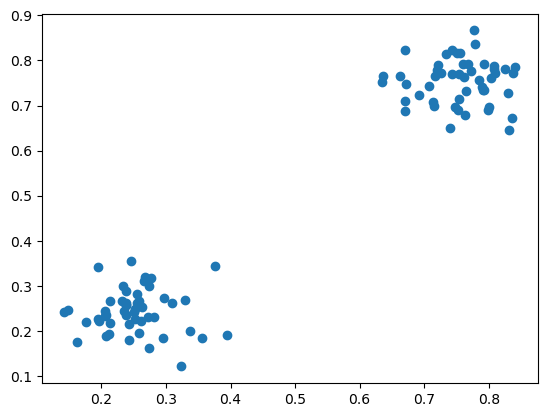

In [7]:
plt.scatter(pts2[:, 0], pts2[:, 1])

In [8]:
knn2 = NearestNeighbors(n_neighbors=20).fit(pts2)
nn_adjacency_2 = knn2.kneighbors_graph(X=pts2, n_neighbors=20, mode="connectivity")
nn_Graph_2 = nx.from_scipy_sparse_array(nn_adjacency_2)

for node in nn_Graph_2.nodes:
    nn_Graph_2.remove_edge(node, node)

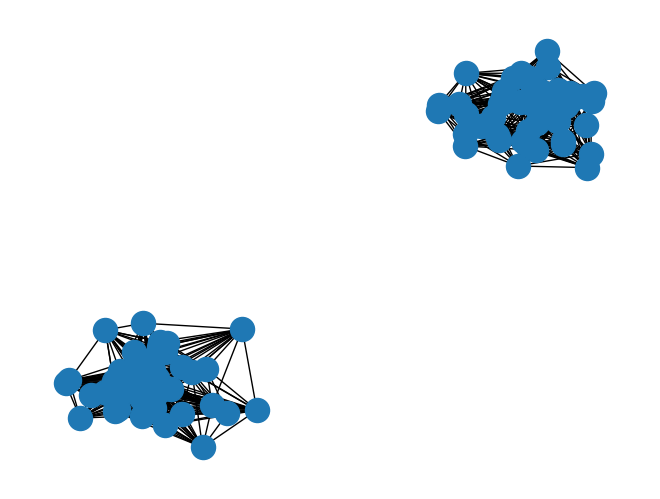

In [9]:
nx.draw(nn_Graph_2, pos={i: p for i, p in enumerate(pts2)})

## Combined

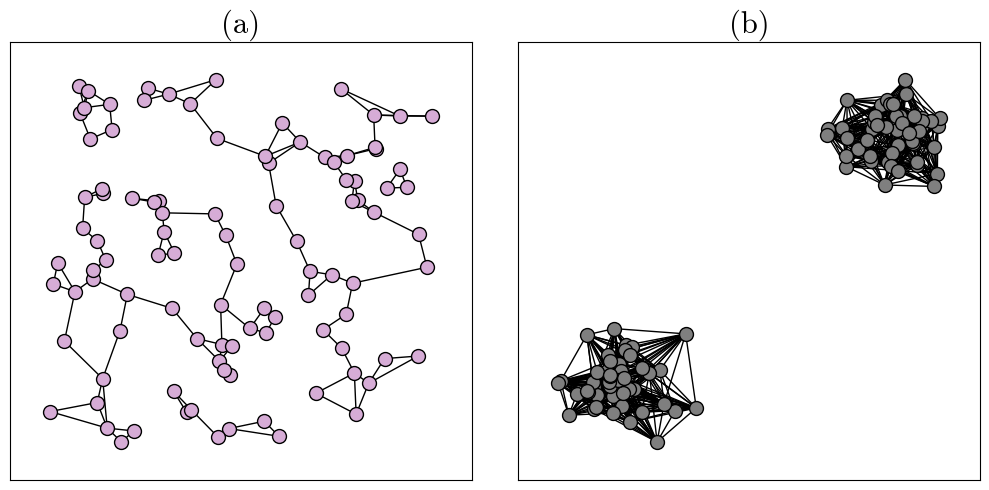

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

nx.draw_networkx(
    nn_Graph,
    pos={i: p for i, p in enumerate(pts1)},
    with_labels=False,
    ax=axs[0],
    node_size=100,
    node_color="#D6ACD6",
    linewidths=1,
    edgecolors="black",
)
axs[0].set_title("(a)", fontname="serif", family="cmr10", size=22)


nx.draw_networkx(
    nn_Graph_2,
    pos={i: p for i, p in enumerate(pts2)},
    with_labels=False,
    ax=axs[1],
    node_size=100,
    node_color="#7f7f7f",
    linewidths=1,
    edgecolors="black",
)
axs[1].set_title("(b)", fontname="serif", family="cmr10", size=22)


plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

plt.savefig("NN_example.pdf")